# Apply RedMagic Mask

In [1]:
from astropy.table import Table
import h5py as h
import numpy as np
import fitsio
import healpy as hp

In [2]:
data_dir = '/global/cscratch1/sd/elp25/txpipe-reanalysis/desy1/data/'

In [3]:
!ls {data_dir}

2pt_NG_mcal_1110.fits				lens_photoz_stack.hdf5
DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits	shear_catalog_desy1.h5
des_y1_3x2pt_sacc_data.fits			shear_photoz_stack.hdf5
desy1_cosmicshear_sacc_data.fits


In [4]:
healpix_table = Table.read(data_dir+'DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits')

In [8]:
len(healpix_table['FRACGOOD'][mask_good])

5237312

In [7]:
mask_good = (healpix_table['FRACGOOD']==1.0)
len(healpix_table['FRACGOOD'][mask_good])

5237312

In [9]:
healpix_lookup = {}
for i in range(len(healpix_table['HPIX'].data)):
    healpix_lookup[healpix_table['HPIX'].data[i]] = healpix_table['FRACGOOD'].data[i]

In [10]:
hpx = hp.read_map(data_dir+'DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',0)

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [11]:
nside = 4096

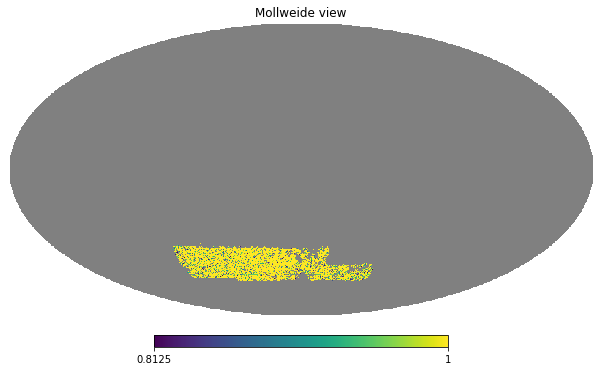

In [12]:
hp.mollview(hpx)

In [13]:
shear_cat = h.File('/global/cscratch1/sd/elp25/TXPipe/data/desy1/inputs/shear_catalog_desy1_merged.h5', 'r')

In [14]:
def compute_mask(healpix_table, healpix_lookup, ras, decs):

        #get the healpix indices for the ra and dec values
        
        phi = np.deg2rad(ras)
        theta = 0.5 * np.pi - np.deg2rad(decs)
        nside = 4096
        ipixs = hp.ang2pix(nside, theta, phi)
        
        #get the fracgood values for those pixels
        fracgoods = []
        for ipix in ipixs:
            try:
                fracgoods.append(healpix_lookup[ipix])
            except:
                fracgoods.append(1.0)
        fracgood = np.array(fracgoods)
        radmask = np.zeros(ras.size, dtype=np.bool)
        #radmask[np.where(fracgood > np.random.rand(ras.size))] = True
        radmask[np.where(fracgood == 1.0)] = True

        return radmask

In [15]:
ras = np.zeros(1000000)
radmask = np.zeros(1000000, dtype=np.bool)
fracgood = 0.7
radmask[np.where(fracgood > np.random.rand(1000000))] = True

In [17]:
cut = [True,True,False]
arr = np.array([1,2,3])

In [5]:
len(ras[radmask])

699410

In [125]:
shear_cat

<HDF5 file "shear_catalog_desy1_merged.h5" (mode r)>

In [15]:
ras = shear_cat['metacal/ra'][()]

In [16]:
decs = shear_cat['metacal/dec'][()]

In [17]:
#shear_cat.close()#

In [18]:
radmask = compute_mask(healpix_table, healpix_lookup, ras, decs)

In [23]:
np.unique(shear_cat['metacal/mcal_flags'][()])

array([0], dtype=int32)

In [19]:
np.unique(radmask)

array([False,  True])

In [22]:
len(radmask[radmask==True])

30468231

In [21]:
(len(radmask[radmask==False])/len(radmask))*100

12.54667055574809

In [70]:
len(decs)

34839418

In [71]:
len(decs[radmask])

34562488

In [72]:
np.min(decs)

-59.999995999999996

In [24]:
southern_mask = decs<-35

In [26]:
len(decs[radmask&southern_mask])

26740223

In [28]:
dnames = ['dec', 'mcal_T', 'mcal_T_1m', 'mcal_T_1p', 'mcal_T_2m', 'mcal_T_2p', 'mcal_flags', 'mcal_g1', 'mcal_g1_1m', 'mcal_g1_1p', 'mcal_g1_2m', 'mcal_g1_2p', 'mcal_g2', 'mcal_g2_1m', 'mcal_g2_1p', 'mcal_g2_2m', 'mcal_g2_2p', 'mcal_mag_err_i', 'mcal_mag_err_i_1m', 'mcal_mag_err_i_1p', 'mcal_mag_err_i_2m', 'mcal_mag_err_i_2p', 'mcal_mag_err_r', 'mcal_mag_err_r_1m', 'mcal_mag_err_r_1p', 'mcal_mag_err_r_2m', 'mcal_mag_err_r_2p', 'mcal_mag_err_z', 'mcal_mag_err_z_1m', 'mcal_mag_err_z_1p', 'mcal_mag_err_z_2m', 'mcal_mag_err_z_2p', 'mcal_mag_i', 'mcal_mag_i_1m', 'mcal_mag_i_1p', 'mcal_mag_i_2m', 'mcal_mag_i_2p', 'mcal_mag_r', 'mcal_mag_r_1m', 'mcal_mag_r_1p', 'mcal_mag_r_2m', 'mcal_mag_r_2p', 'mcal_mag_z', 'mcal_mag_z_1m', 'mcal_mag_z_1p', 'mcal_mag_z_2m', 'mcal_mag_z_2p', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'mcal_s2n', 'mcal_s2n_1m', 'mcal_s2n_1p', 'mcal_s2n_2m', 'mcal_s2n_2p', 'objectId', 'ra', 'snr_i', 'snr_r', 'snr_z', 'tilename', 'region', 'mean_z', 'mean_z_1p', 'mean_z_1m', 'mean_z_2p', 'mean_z_2m'] 
 
f = h.File('/global/cscratch1/sd/elp25/TXPipe/data/desy1/inputs/shear_catalog_desy1_masked2.h5', 'w')
g = f.create_group('metacal')
for i in range(len(dnames)):
    print(dnames[i])
    g.create_dataset(dnames[i], data=shear_cat['/metacal/'+dnames[i]].value, dtype=shear_cat['/metacal/'+dnames[i]].dtype)
g.create_dataset('mask', data=radmask&southern_mask, dtype=bool)
metadata = {'catalog_type':'metacal'}
g.attrs.update(metadata)

dec


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


mcal_T
mcal_T_1m
mcal_T_1p
mcal_T_2m
mcal_T_2p
mcal_flags
mcal_g1
mcal_g1_1m
mcal_g1_1p
mcal_g1_2m
mcal_g1_2p
mcal_g2
mcal_g2_1m
mcal_g2_1p
mcal_g2_2m
mcal_g2_2p
mcal_mag_err_i
mcal_mag_err_i_1m
mcal_mag_err_i_1p
mcal_mag_err_i_2m
mcal_mag_err_i_2p
mcal_mag_err_r
mcal_mag_err_r_1m
mcal_mag_err_r_1p
mcal_mag_err_r_2m
mcal_mag_err_r_2p
mcal_mag_err_z
mcal_mag_err_z_1m
mcal_mag_err_z_1p
mcal_mag_err_z_2m
mcal_mag_err_z_2p
mcal_mag_i
mcal_mag_i_1m
mcal_mag_i_1p
mcal_mag_i_2m
mcal_mag_i_2p
mcal_mag_r
mcal_mag_r_1m
mcal_mag_r_1p
mcal_mag_r_2m
mcal_mag_r_2p
mcal_mag_z
mcal_mag_z_1m
mcal_mag_z_1p
mcal_mag_z_2m
mcal_mag_z_2p
mcal_psf_T_mean
mcal_psf_g1
mcal_psf_g2
mcal_s2n
mcal_s2n_1m
mcal_s2n_1p
mcal_s2n_2m
mcal_s2n_2p
objectId
ra
snr_i
snr_r
snr_z
tilename
region
mean_z
mean_z_1p
mean_z_1m
mean_z_2p
mean_z_2m


In [29]:
f['metacal/redshift_true'] = f['metacal/mean_z']

In [30]:
f.close()

In [39]:
ff = h.File('/global/cscratch1/sd/elp25/TXPipe/data/desy1/inputs/shear_catalog_desy1_masked2.h5','r+')

In [40]:
mask = ff['metacal/mask'][()]

In [41]:
len(ff['metacal/mask'][()][mask])

26740223

In [43]:
ff.close()